<a href="https://colab.research.google.com/github/Mateo289/Teoria_senales/blob/main/17_diciembre_Cuaderno2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas matplotlib


Saving daily-total-female-births.csv to daily-total-female-births.csv


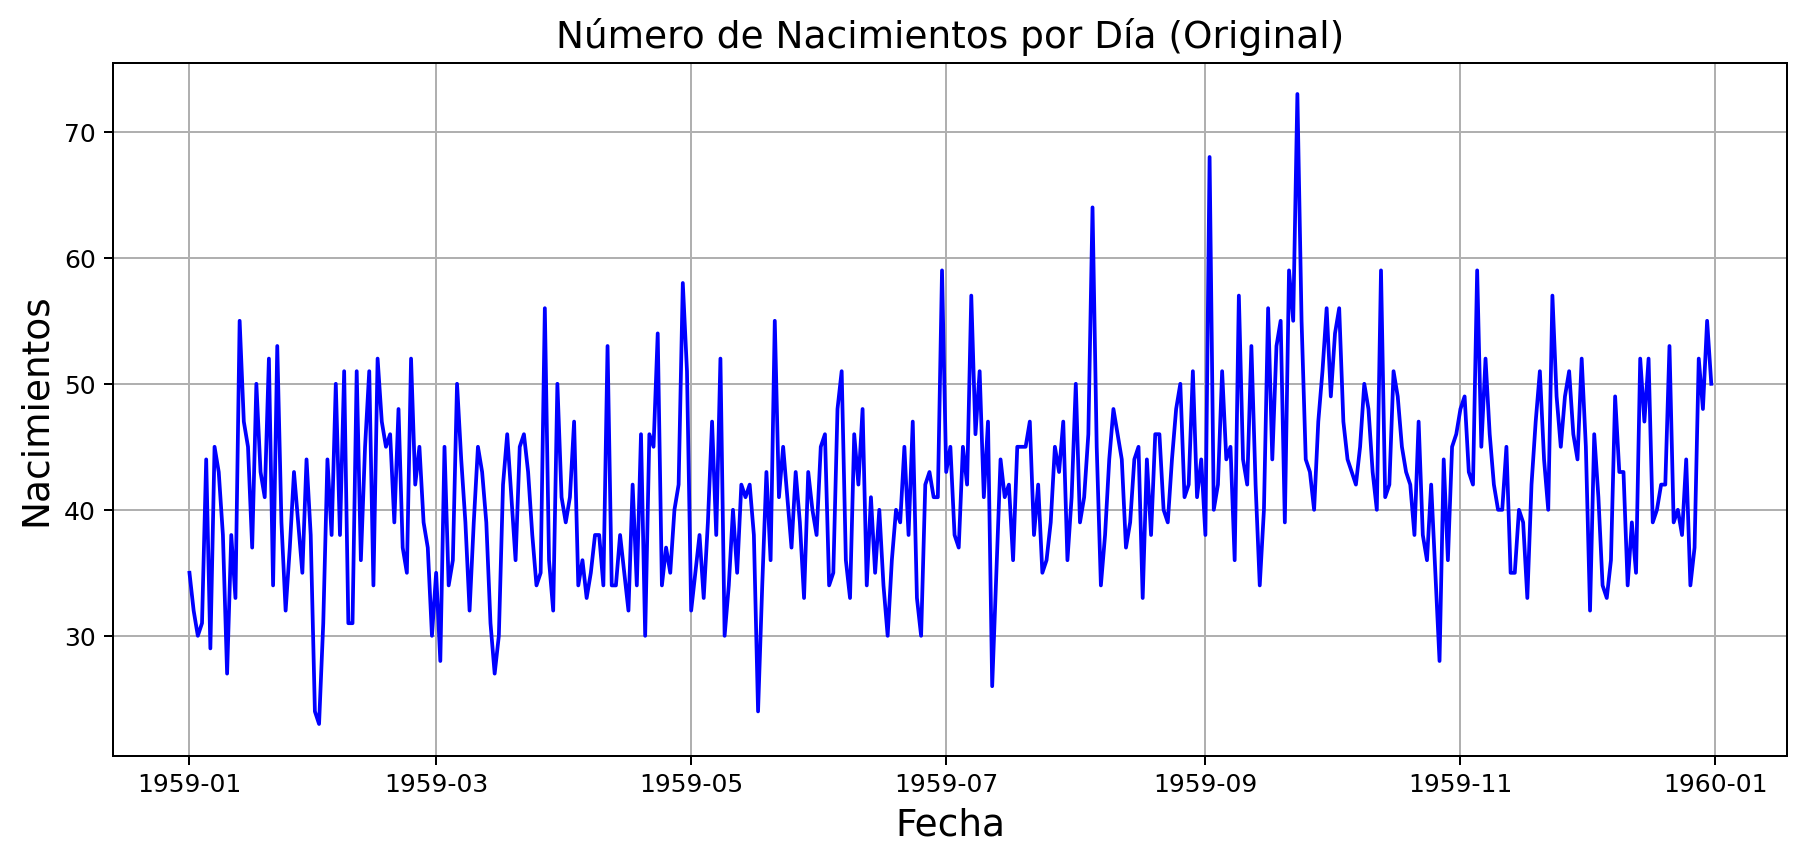

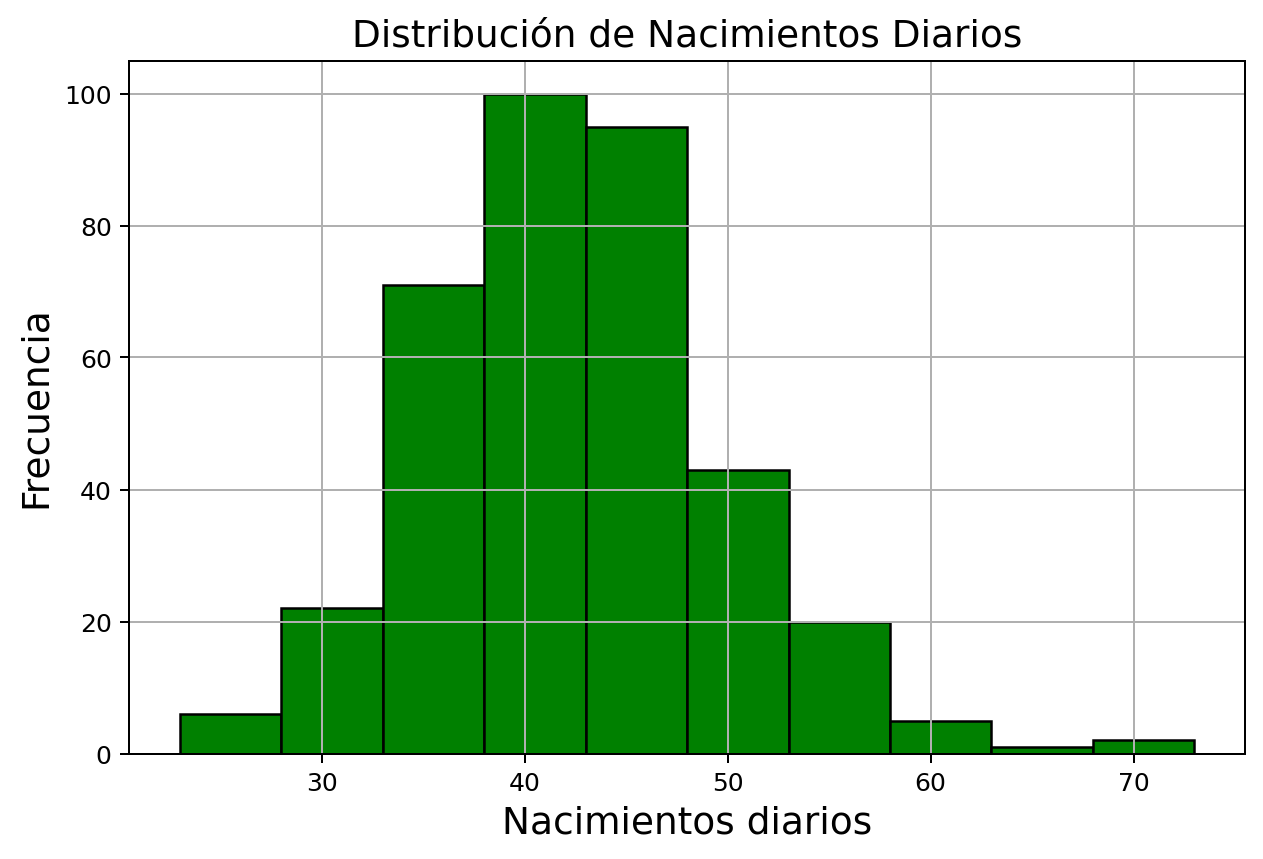

In [3]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
uploaded = files.upload()

df = pd.read_csv('daily-total-female-births.csv', parse_dates=['Date'])

# Graficar la serie temporal original (sin puntos)
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Births'], linestyle='-', color='blue')
plt.title('Número de Nacimientos por Día (Original)')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.grid(True)
plt.show()

# Mostrar la distribución de los datos (Histograma)
plt.figure(figsize=(8,5))
plt.hist(df['Births'], bins=10, color='green', edgecolor='black')
plt.title('Distribución de Nacimientos Diarios')
plt.xlabel('Nacimientos diarios')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Saving daily-total-female-births.csv to daily-total-female-births (8).csv


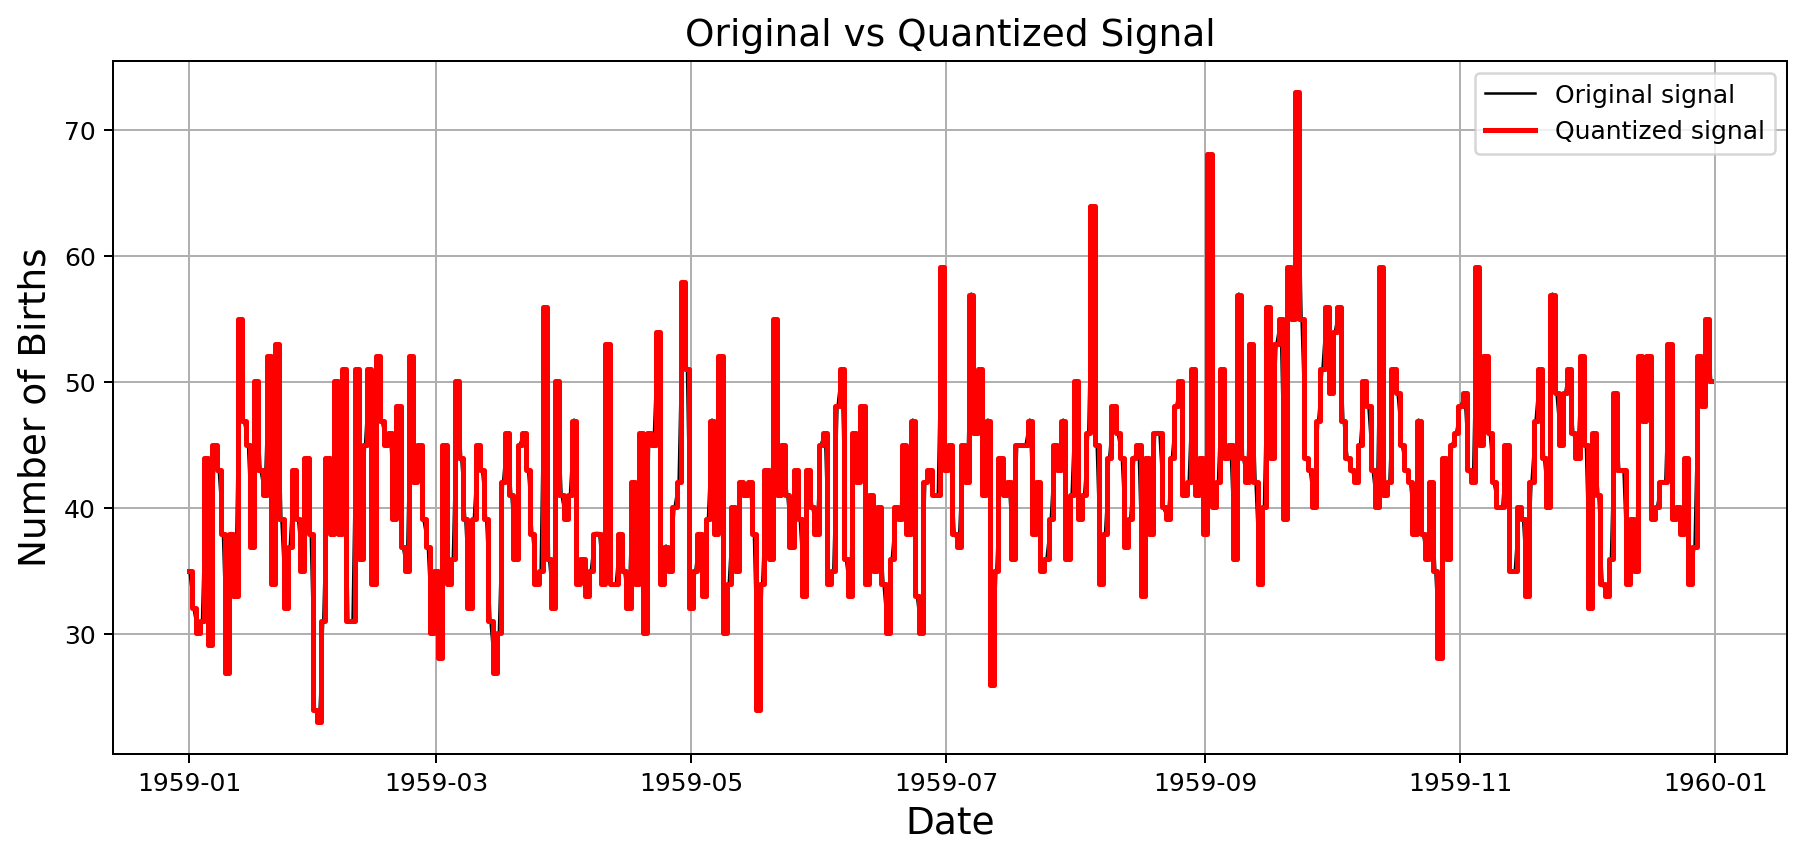

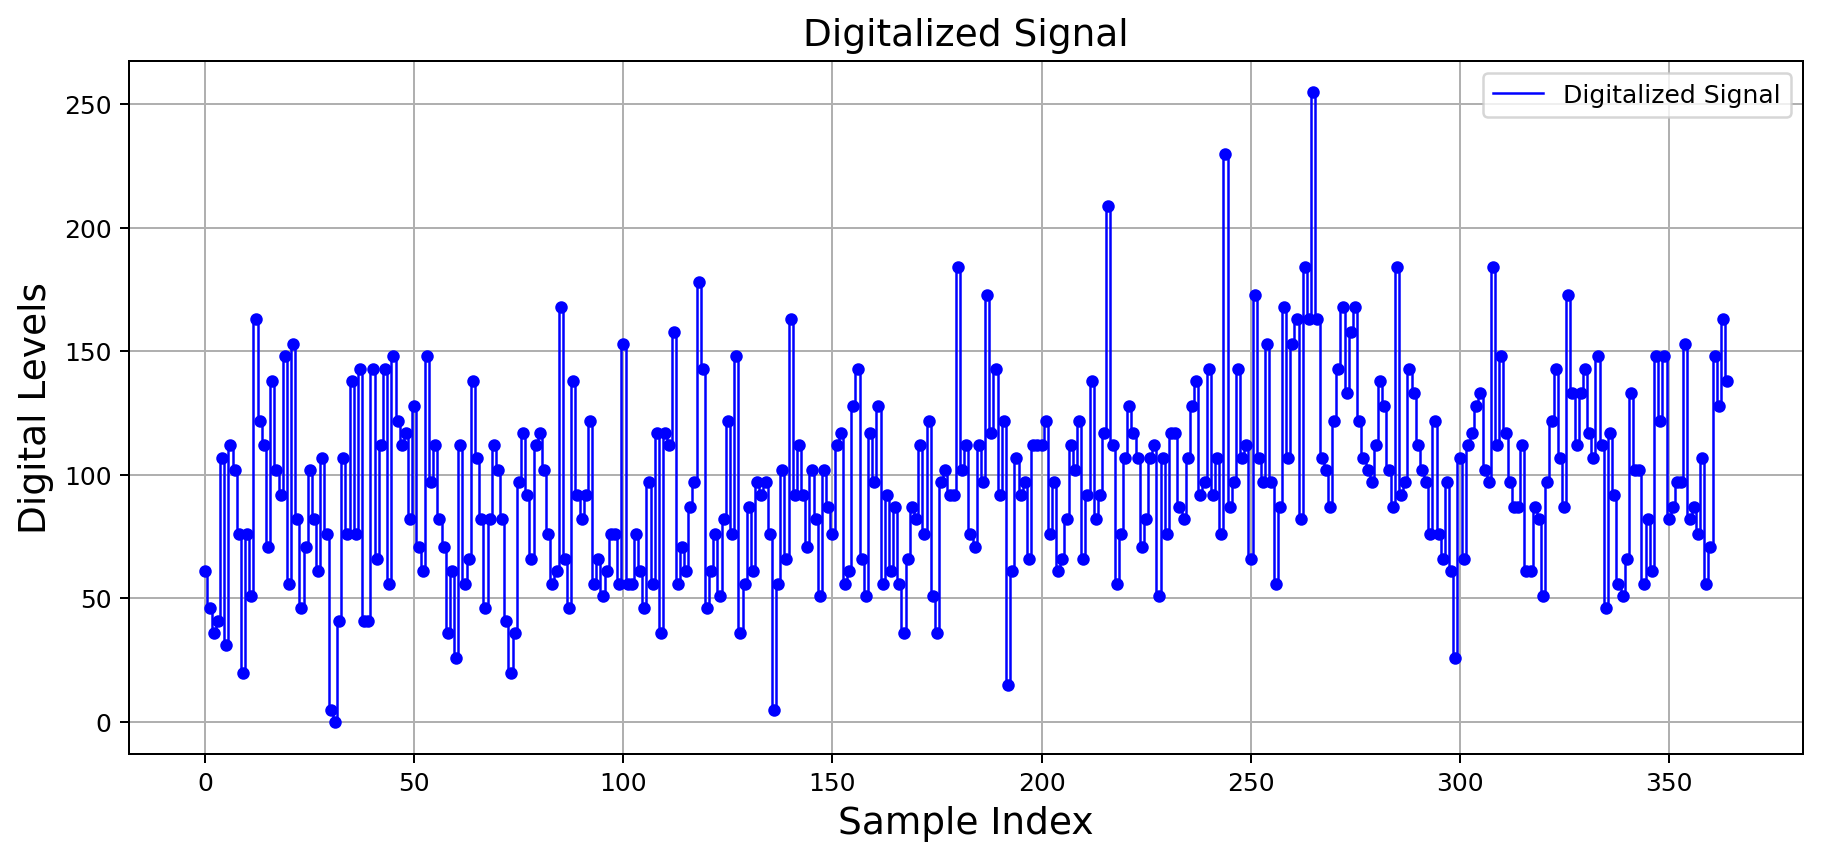


Señal codificada en ceros y unos (primeros 64 bits): 0011110100101110001001000010100101101011000111110111000001100110...


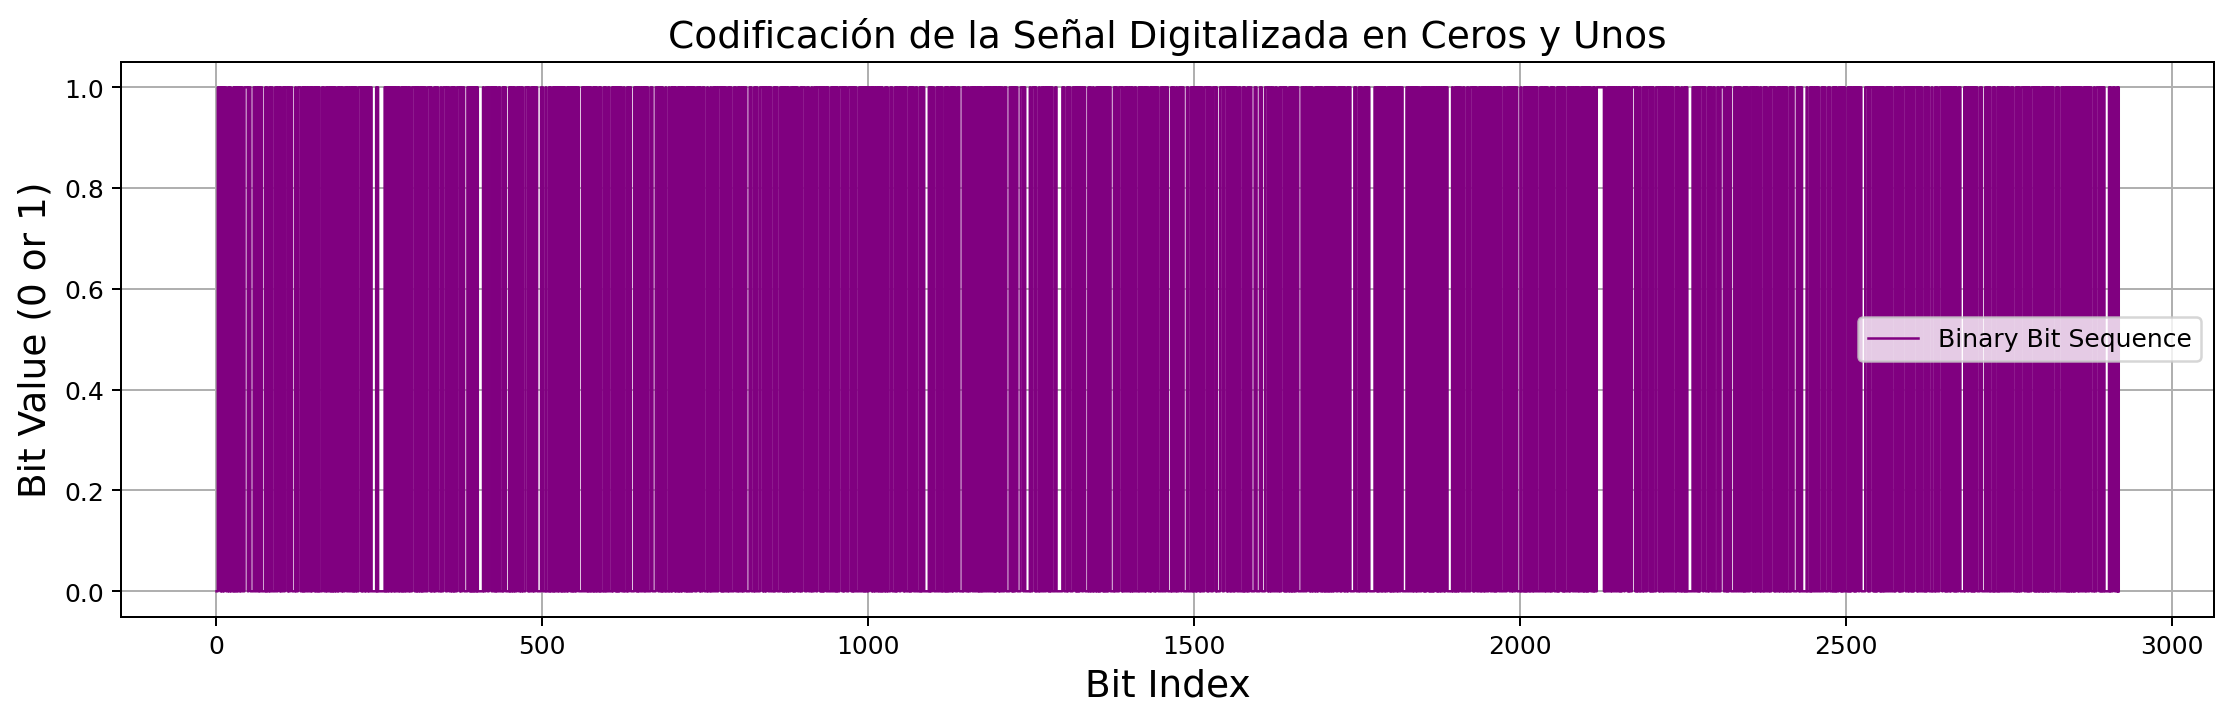

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Función para cuantificar señal con un número variable de bits
def quantize_signal(signal, num_bits, min_val=None, max_val=None):
    """Cuantificación de señal con un número variable de bits."""
    if min_val is None:
        min_val = np.min(signal)
    if max_val is None:
        max_val = np.max(signal)

    # Calcular niveles de cuantificación
    quant_levels = 2 ** num_bits

    # Normalizar la señal al rango [0, quant_levels - 1]
    normalized_signal = (signal - min_val) / (max_val - min_val) * (quant_levels - 1)

    # Cuantificar y ajustar al rango original
    quantized_signal = np.round(normalized_signal)
    quantized_signal = quantized_signal / (quant_levels - 1) * (max_val - min_val) + min_val
    return quantized_signal

# Subir archivo
df_file = files.upload()

# Leer el archivo CSV cargado
df = pd.read_csv('daily-total-female-births.csv', parse_dates=['Date'])

# Obtener la señal de nacimientos
births = df['Births'].values

# Definir el número de bits para la cuantificación
num_bits = 8  # Número de bits ajustable

# Cuantificar la señal
quantized_births = quantize_signal(births, num_bits)

# Graficar la señal original y la cuantificada
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], births, label='Original signal', color='black', linewidth=1)
plt.step(df['Date'], quantized_births, label='Quantized signal', color='red', linewidth=2, where='mid')
plt.title('Original vs Quantized Signal')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Digitalizar la señal con base en los niveles de cuantificación
def digitalize_signal(quantized_signal, num_bits):
    """Convierte la señal cuantificada en una señal digitalizada."""
    # Normalizar y redondear los niveles de cuantización
    min_val = np.min(quantized_signal)
    max_val = np.max(quantized_signal)
    levels = (quantized_signal - min_val) / (max_val - min_val) * (2**num_bits - 1)
    levels = np.round(levels).astype(int)

    # Convertir niveles a representaciones binarias
    binary_signal = [format(level, f'0{num_bits}b') for level in levels]
    return binary_signal

# Obtener la señal digitalizada
binary_signal = digitalize_signal(quantized_births, num_bits)

# Graficar la señal digitalizada con marcador 'o'
plt.figure(figsize=(12, 5))
binary_indices = np.arange(len(binary_signal))
plt.step(binary_indices, [int(bits, 2) for bits in binary_signal], color='blue', linewidth=1, where='mid', label='Digitalized Signal')
plt.plot(binary_indices, [int(bits, 2) for bits in binary_signal], 'o', color='blue', markersize=4)
plt.title('Digitalized Signal')
plt.xlabel('Sample Index')
plt.ylabel('Digital Levels')
plt.legend()
plt.grid(True)
plt.show()

# Codificación en ceros y unos
def encode_to_bits(binary_signal):
    """Codifica la señal digitalizada en una única secuencia de bits."""
    return ''.join(binary_signal)

# Codificar la señal digitalizada en una única cadena de bits
encoded_bits = encode_to_bits(binary_signal)
print(f"\nSeñal codificada en ceros y unos (primeros 64 bits): {encoded_bits[:64]}...")

# Graficar la señal binaria como una secuencia de bits
bit_sequence = np.array([int(bit) for bit in encoded_bits])  # Convertir a lista de bits
time_indices = np.arange(len(bit_sequence))  # Índices de tiempo

plt.figure(figsize=(15, 4))
plt.step(time_indices, bit_sequence, color='purple', linewidth=1, where='post', label='Binary Bit Sequence')
plt.title('Codificación de la Señal Digitalizada en Ceros y Unos')
plt.xlabel('Bit Index')
plt.ylabel('Bit Value (0 or 1)')
plt.grid(True)
plt.legend()
plt.show()
